In [8]:
pwd

u'/Users/kvn219/NYU/basic_leaflet/preprocessing'

In [9]:
import os
import fiona

shpfile = fiona.open("../data/ne_10m_admin_0_map_subunits/ne_10m_admin_0_map_subunits.shp", 'r')
shpfile.crs

{'init': u'epsg:4326'}

In [10]:
print shpfile.driver
print len(shpfile)

ESRI Shapefile
356


In [12]:
record = shpfile.next()
record.keys()

['geometry', 'type', 'id', 'properties']

In [19]:
for i in record.keys():
    print record[i]
    print 

{'type': 'Polygon', 'coordinates': [[(-61.88361568899995, 17.04901764500005), (-61.87922115799995, 17.06045156500008), (-61.88280188699994, 17.07021719000005), (-61.882435675999915, 17.07880280200004), (-61.86620032499988, 17.086859442000076), (-61.87336178299992, 17.089544989000075), (-61.894154425999915, 17.10053131700002), (-61.88312740799995, 17.11050039300011), (-61.865386522999955, 17.117824611000117), (-61.84235592399989, 17.124416408000087), (-61.850453253999916, 17.137640692000048), (-61.848784959999904, 17.14948151200008), (-61.83967037699992, 17.159857489000075), (-61.82526607999995, 17.16876862200013), (-61.79336503799993, 17.164943752000113), (-61.78066972599987, 17.14716217700004), (-61.77301998599992, 17.1265322940001), (-61.756418423999975, 17.114162502000056), (-61.755441860999895, 17.12303294500012), (-61.752756313999924, 17.128892320000148), (-61.743316209999904, 17.141506252000028), (-61.73761959499993, 17.132961330000114), (-61.72984778599994, 17.12799713700005), (

(63, 2)


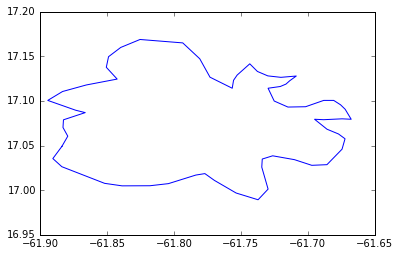

In [21]:
%matplotlib inline 

import numpy as np
from matplotlib.pyplot import plot

for poly in record['geometry']['coordinates']:
    coords = np.array(poly).squeeze()
    print coords.shape
    plot(coords[:,0], coords[:,1])

In [ ]:
import fiona
import json

features = []
crs = None
with fiona.collection("../data/ne_10m_admin_0_map_subunits/ne_10m_admin_0_map_subunits.shp", "r") as source:
    for feat in source:
        feat['properties'].update() # with your attributes
        features.append(feat)
    crs = " ".join("+%s=%s" % (k,v) for k,v in source.crs.items())

my_layer = {
    "type": "FeatureCollection",
    "features": features,
    "crs": {
        "type": "link", 
        "properties": {"href": "my_layer.crs", "type": "proj4"} }}

with open("my_layer.json", "w") as f:
    f.write(json.dumps(my_layer))
with open("my_layer.crs", "w") as f:
    f.write(crs)

In [ ]:
OsmApi?

In [ ]:
from imposm.parser import OSMParser

# simple class that handles the parsed OSM data.
class HighwayCounter(object):
    highways = 0

    def ways(self, ways):
        # callback method for ways
        for osmid, tags, refs in ways:
            if 'highway' in tags:
                self.highways += 1

# instantiate counter and parser and start parsing
counter = HighwayCounter()
p = OSMParser(concurrency=4, ways_callback=counter.ways)
p.parse('germany.osm.pbf')

# done
print(counter.highways)
